In [1]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [2]:
!conda env list

# conda environments:
#
GoogEarthEngine          /home/jp/miniconda2/envs/GoogEarthEngine
astroconda               /home/jp/miniconda2/envs/astroconda
everest-pipeline         /home/jp/miniconda2/envs/everest-pipeline
helios                   /home/jp/miniconda2/envs/helios
iraf27                   /home/jp/miniconda2/envs/iraf27
ircs_pol                 /home/jp/miniconda2/envs/ircs_pol
moscatel                 /home/jp/miniconda2/envs/moscatel
radmc3dpy                /home/jp/miniconda2/envs/radmc3dpy
root                  *  /home/jp/miniconda2



# Dipper (sub-)list

The links below show the quick look lightcurve reduced using a K2 data pipeline called [K2SFF](https://archive.stsci.edu/prepds/k2sff/) available online.

* [EPIC203824153](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203824153.html)
* [EPIC203937317](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203937317.html)
* [EPIC204278916](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204278916.html)
* [EPIC204469637](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204469637.html)
* [EPIC204514548](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204514548.html)
* [EPIC204630363](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204630363.html)
* [EPIC204638512](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204638512.html)
* [EPIC205151387](https://www.cfa.harvard.edu/~avanderb/k2c2/ep205151387.html)
* [EPIC203384911](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203384911.html)

## k2plr for downloading lightcurve

In [8]:
import k2plr
k2plr.__version__

'0.2.5'

In [9]:
client = k2plr.API()
epic = client.k2_star(203824153)

In [10]:
print(epic.k2_ra, epic.k2_dec)

(247.225281, -24.795612)


In [21]:
lcs = epic.get_target_pixel_files()

In [46]:
#from astropy.io import fits
hdulist = lc.open()
hdulist.close()

In [48]:
hdulist.info()

Filename: /home/jp/.kplr/data/k2/target_pixel_files/203824153/ktwo203824153-c02_lpd-targ.fits.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      54   ()              
1    TARGETTABLES  BinTableHDU    274   3856R x 12C   [D, E, J, 110J, 110E, 110E, 110E, 110E, 110E, J, E, E]   
2    APERTURE    ImageHDU        48   (11, 10)     int32   


In [52]:
hdulist[0].header['OBJECT']

'EPIC 203824153'

In [68]:
hdulist = lc.open()
#get keys of a structured (numpy?) array
hdulist[1].data.dtype.names

('TIME',
 'TIMECORR',
 'CADENCENO',
 'RAW_CNTS',
 'FLUX',
 'FLUX_ERR',
 'FLUX_BKG',
 'FLUX_BKG_ERR',
 'COSMIC_RAYS',
 'QUALITY',
 'POS_CORR1',
 'POS_CORR2')

In [69]:
# Loop over the datasets and read in the data.
time, flux, ferr, quality = [], [], [], []
for lc in lcs:
    with lc.open() as f:
        # The lightcurve data are in the first FITS HDU.
        hdu_data = f[1].data #pyfits.fitsrec.FITS_rec
        time.append(hdu_data["time"])
        flux.append(hdu_data["flux"])
        ferr.append(hdu_data["flux_err"])
        quality.append(hdu_data["quality"])

In [100]:
import numpy as np
np.array(flux).shape #10x11 pix with 3856 measurements

(1, 3856, 10, 11)

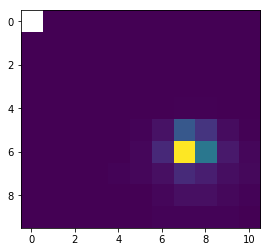

In [92]:
%matplotlib inline
plt.imshow(flux[0][0])